## 11.3. 梯度下降

### 11.3.1. 一维梯度下降

In [1]:
%matplotlib inline
import numpy as np
import mindspore
from d2l import mindspore as d2l

def f(x):  # 目标函数
    return x ** 2

def f_grad(x):  # 目标函数的梯度(导数)
    return 2 * x

In [2]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {float(x):f}')
    return results

results = gd(0.2, f_grad)

epoch 10, x: 0.060466


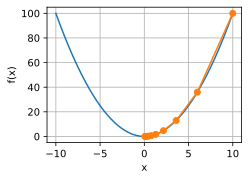

In [3]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = d2l.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [
        f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])

show_trace(results, f)

#### 11.3.1.1. 学习率

epoch 10, x: 3.486784


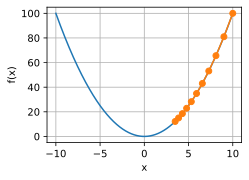

In [4]:
show_trace(gd(0.05, f_grad), f)

epoch 10, x: 61.917364


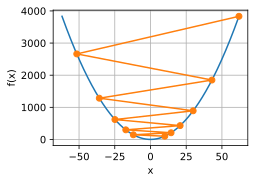

In [5]:
show_trace(gd(1.1, f_grad), f)

#### 11.3.1.2. 局部最小值

epoch 10, x: -1.528165


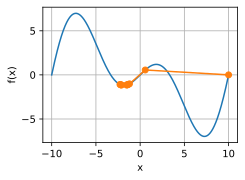

In [6]:
c = d2l.tensor(0.15 * np.pi)

def f(x):  # 目标函数
    return x * d2l.cos(c * x)

def f_grad(x):  # 目标函数的梯度
    return d2l.cos(c * x) - c * x * d2l.sin(c * x)

show_trace(gd(2, f_grad), f)

### 11.3.2. 多元梯度下降

In [7]:
def train_2d(trainer, steps=20, f_grad=None):  #@save
    """用定制的训练机优化2D目标函数"""
    # s1和s2是稍后将使用的内部状态变量
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):  #@save
    """显示优化过程中2D变量的轨迹"""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = d2l.meshgrid(d2l.arange(-5.5, 1.0, 0.1),
                          d2l.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 20, x1: -0.057646, x2: -0.000073


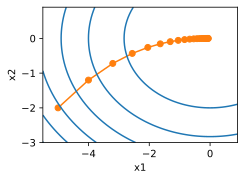

In [8]:
def f_2d(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):  # 目标函数的梯度
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

### 11.3.3. 自适应方法

#### 11.3.3.1. 牛顿法

epoch 10, x: 0.0


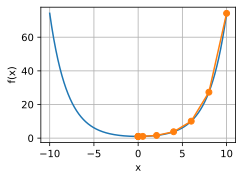

In [9]:
c = d2l.tensor(0.5)

def f(x):  # O目标函数
    return d2l.cosh(c * x)

def f_grad(x):  # 目标函数的梯度
    return c * d2l.sinh(c * x)

def f_hess(x):  # 目标函数的Hessian
    return c**2 * d2l.cosh(c * x)

def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton(), f)

epoch 10, x: 26.834133


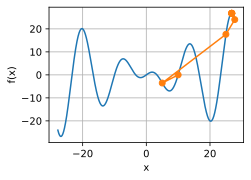

In [10]:
c = d2l.tensor(0.15 * np.pi)

def f(x):  # 目标函数
    return x * d2l.cos(c * x)

def f_grad(x):  # 目标函数的梯度
    return d2l.cos(c * x) - c * x * d2l.sin(c * x)

def f_hess(x):  # 目标函数的Hessian
    return - 2 * c * d2l.sin(c * x) - x * c**2 * d2l.cos(c * x)

show_trace(newton(), f)

epoch 10, x: 7.26986


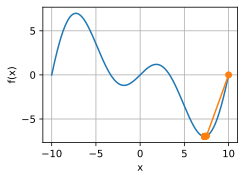

In [11]:
show_trace(newton(0.5), f)